In [1]:
from pathlib import Path
import numpy as np

In [22]:
from util.plot.heatmap import plot_csi

In [16]:
from util.preprocess.csi.denoising import hampel_filter

In [27]:
from util.preprocess.csi.normalize import normalize_csi_amplitudes_by_frame_power

In [38]:
from util.preprocess.csi.phase import remove_timing_offset

In [61]:
root_data_dirpath = Path('/workspace/deformation-prediction-multi-environment/data')
resampled_data_dirpath = root_data_dirpath / 'preprocessed' / 'csi' / 'resampled'
save_dirpath = root_data_dirpath / 'preprocessed' / 'csi' / 'amp_and_phase'

In [17]:
trash_subcarriers = [0,1,2,3,4,5,32,59,60,61,62,63]
useful_subcarriers = [k for k in range(64) if k not in trash_subcarriers]

In [44]:
def amp_preprocess(amp):
    amp_filtered = hampel_filter(amp[:, useful_subcarriers], window_size=200, n_sigmas=3)
    amp_normalized = normalize_csi_amplitudes_by_frame_power(amp_filtered)

    return amp_normalized

In [43]:
def phase_preprocess(phase):
    unwrapped_phase = np.unwrap(phase[:, useful_subcarriers], axis=1)
    phase_without_to = remove_timing_offset(unwrapped_phase)
    phase_filtered = hampel_filter(phase_without_to, window_size=200, n_sigmas=3)

    return phase_filtered

In [51]:
def windowing(data, window_size):
    # スライディングウィンドウを適用して、(N, window_size, features)の形に変換
    shape = (data.shape[0] // window_size, window_size, data.shape[1])
    return data[:shape[0] * window_size].reshape(shape)

In [63]:
for location in ['512', '511', '514B']:
    location_data_dirpath = resampled_data_dirpath / location
    
    # サブディレクトリをすべて取得
    session_dirpaths = [d for d in location_data_dirpath.iterdir() if d.is_dir()]
    
    amplitudes = []
    phases = []
    # 結果を表示
    for session_dirpath in session_dirpaths:
        amp = np.load(session_dirpath / 'amp.npy')
        phase = np.load(session_dirpath / 'phase.npy')
    
        amplitudes.append(amp_preprocess(amp))
        phases.append(phase_preprocess(phase))

    concatenated_amp = np.concatenate(amplitudes)
    concatenated_phase = np.concatenate(phases)

    csi = np.stack((windowing(concatenated_amp, 10), windowing(concatenated_phase, 10)), axis=-1)

    print(csi.shape)

    save_location_dirpath = save_dirpath / location
    save_location_dirpath.mkdir(parents=True, exist_ok=True)
    np.save(save_location_dirpath / 'csi.npy', csi)

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

(12000, 10, 52, 2)


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

(12000, 10, 52, 2)


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

(12000, 10, 52, 2)


# Denoising

In [19]:
amp = amplitudes[0]

In [24]:
amp_filtered = hampel_filter(amp[:, useful_subcarriers], window_size=200, n_sigmas=3)

Output()

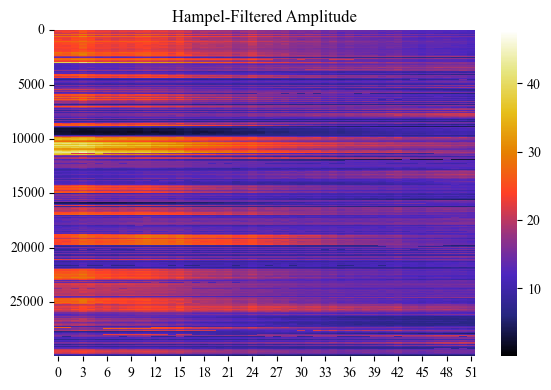

In [25]:
plot_csi(amp_filtered, 'Hampel-Filtered Amplitude')

# Normalize

In [29]:
amp_normalized = normalize_csi_amplitudes_by_frame_power(amp_filtered)

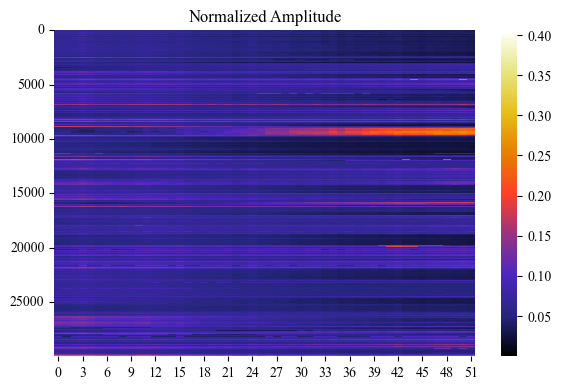

In [30]:
plot_csi(amp_normalized, 'Normalized Amplitude')

# Phase

In [31]:
phase = phases[0]

In [36]:
unwrapped_phase = np.unwrap(phase[:, useful_subcarriers], axis=1)

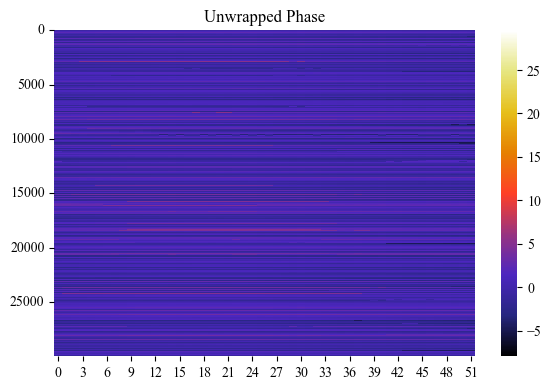

In [37]:
plot_csi(unwrapped_phase, 'Unwrapped Phase')

In [39]:
phase_without_to = remove_timing_offset(unwrapped_phase)

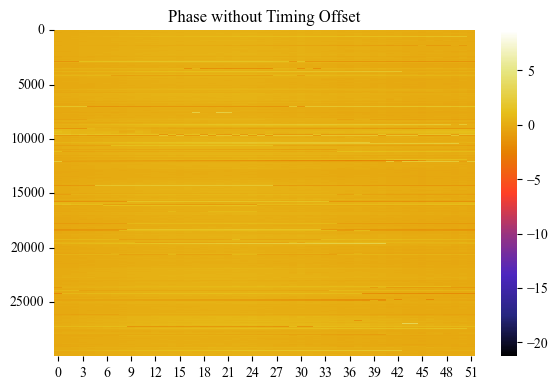

In [40]:
plot_csi(phase_without_to, 'Phase without Timing Offset')

In [41]:
phase_filtered = hampel_filter(phase_without_to, window_size=200, n_sigmas=3)

Output()

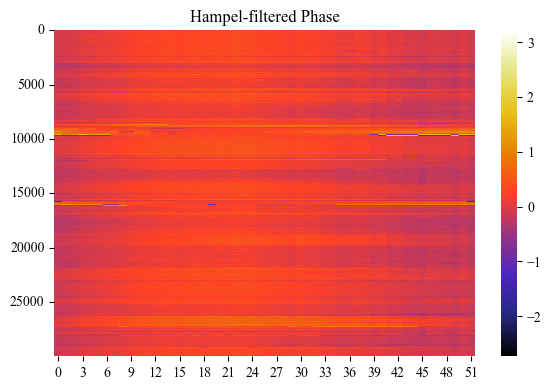

In [42]:
plot_csi(phase_filtered, 'Hampel-filtered Phase')